In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We will carry out the Kolmogorov-Smirnov test to see if calcium intake and drop in blood pressure are associated.

In [72]:
with open('calcium_data.txt') as f:
    rows = [line.split() for line in f]

In [73]:
df = pd.DataFrame.from_records(rows, columns = ['Treatment', 'Begin', 'End', 'Decrease'])

In [74]:
df

,Treatment,Begin,End,Decrease
0,Calcium,107,100,7
1,Calcium,110,114,-4
2,Calcium,123,105,18
3,Calcium,129,112,17
4,Calcium,112,115,-3
5,Calcium,111,116,-5
6,Calcium,107,106,1
7,Calcium,112,102,10
8,Calcium,136,125,11
9,Calcium,102,104,-2


In [75]:
# The decrease in blood pressure for patients taking calcium
Z_1 = df.loc[df.Treatment == 'Calcium'].Decrease.astype('int').to_numpy()

In [76]:
# The decrease in blood pressure for patients taking the placebo
Z_2 = df.loc[df.Treatment == 'Placebo'].Decrease.astype('int').to_numpy()

In [77]:
n_1 = len(Z_1)

In [78]:
n_2 = len(Z_2)

In [79]:
# The function \hat{F}_1 defined as in the Kolmogorov-Smirnov test
F_1 = lambda z: np.sum(Z_1 <= z) / n_1

In [80]:
x = np.arange(-20,20,0.1)

In [81]:
y = np.array([F_1(z) for z in x])

Text(0.5, 1.0, 'Graph of $\\hat F_1$')

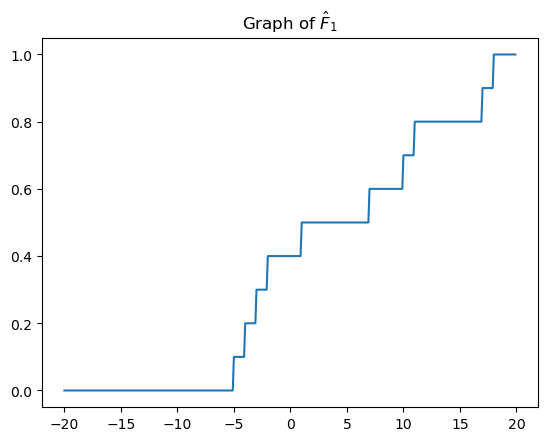

In [82]:
plt.plot(x,y)
plt.title(r'Graph of $\hat F_1$')

In [83]:
# The function \hat{F}_2 defined as in the Kolmogorov-Smirnov test
F_2 = lambda z: np.sum(Z_2 <= z) / n_2

In [84]:
x = np.arange(-20,20,0.1)

In [85]:
y = np.array([F_2(z) for z in x])

Text(0.5, 1.0, 'Graph of $\\hat F_2$')

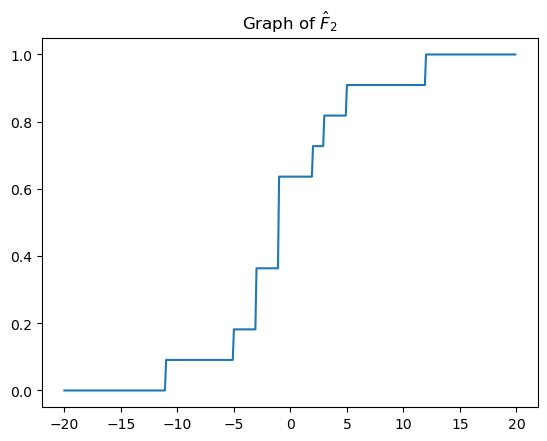

In [86]:
plt.plot(x,y)
plt.title(r'Graph of $\hat F_2$')

We want to compute the quantity $D=\sup_x |\hat F_1(x) - \hat F_2(x)|$. To do this, we will graph $|\hat F_1 - \hat F_2|$. Since this is a step function, with values changing only at discrete inputs, we will be able to find the supremum by looking at the graph.

In [87]:
x = np.arange(-20,20,0.1)

In [88]:
y = np.array([abs(F_1(z)-F_2(z)) for z in x])

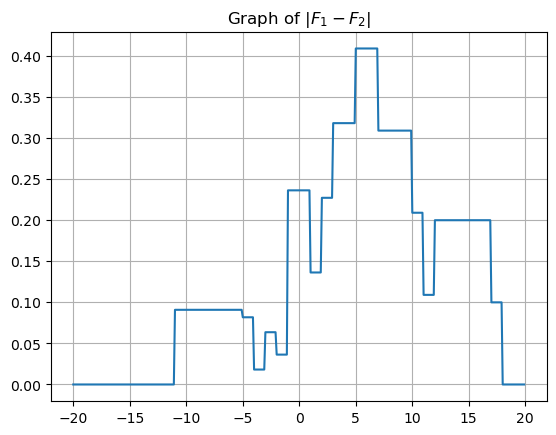

In [89]:
plt.plot(x,y)
plt.title(r'Graph of $|F_1 - F_2|$')
plt.grid()

In [90]:
# The supremum of |F_1(x)-F_2(x)| occurs at x=5.1
D = abs(F_1(5.1) - F_2(5.1))

Now we will estimate a p-value of our test.

In [91]:
# The CDF H(t) appearing in the Kolmogorov-Smirnov test
def Jacobi(t):
    if t <= 0:
        return 0
    else:
        terms = np.array([(-1)**(j-1) * np.exp(-2 * j**2 * t**2) for j in range(1,10001)])
        return 1 - 2*np.sum(terms)

In [92]:
# The infimal level at which we can reject the null hypothesis that blood pressure decrease
# and calcium intake are independent. This is the p-value for the Kolmogorov-Smirnov test.
alpha = 1 - Jacobi(np.sqrt(n_1 * n_2 / (n_1 + n_2)) * D)

In [93]:
print(f'Computed value of D: {D:.5f}')
print(f'Estimated p-value of the Kolmogorov-Smirnov test: {alpha:.5f}')

Computed value of D: 0.40909
Estimated p-value of the Kolmogorov-Smirnov test: 0.34462


Since our p-value is large, we do not reject the null hypothesis that blood pressure decrease and calcium intake are independent.